<a href="https://colab.research.google.com/github/SherifNabil-Eng/Stocks_Prediction/blob/main/Stocks_prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initialization**

In [ ]:
! pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 4.2 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 KB 4.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#drive.mount('/content/drive', force_remount=force_remount)
import os;
os.chdir("/content/gdrive/My Drive/Colab Notebooks/")

Mounted at /content/gdrive


In [ ]:
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yf

from datetime import datetime
from datetime import timedelta as tdelta


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as statses
import scipy.stats as scs


import matplotlib.pyplot as plt
import matplotlib as mpl

import watermark

from datetime import datetime, timedelta

import scipy

from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings ("ignore")

from collections import Counter
from pprint import pprint
from pandas.plotting import autocorrelation_plot

np.random.seed (1234)

import math

import tensorflow as tf

import keras

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import SimpleRNN ,GRU,LSTM
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.layers import *
from keras.models import load_model


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] =15,10

%load_ext watermark
%matplotlib inline
p = print

p('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
p(sys.version)

Machine: Linux x86_64

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [ ]:
# get versions of different packages 

%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 7.9.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

watermark        : 2.3.1
google           : 2.0.3
statsmodels      : 0.12.2
scipy            : 1.7.3
sys              : 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
pandas_datareader: 0.10.0
matplotlib       : 3.2.2
tensorflow       : 2.9.2
numpy            : 1.21.6
pandas           : 1.3.5
keras            : 2.9.0
yfinance         : 0.2.3
sklearn          : 1.0.2



# **`Ticker Information`**

In [ ]:
y_symbol = ['MSFT']

ticker_y = yf.Ticker(y_symbol[0])
ticker_holders_df = ticker_y.major_holders
ticker_holders_df

,0,1
0,0.06%,% of Shares Held by All Insider
1,73.33%,% of Shares Held by Institutions
2,73.38%,% of Float Held by Institutions
3,5956,Number of Institutions Holding Shares


In [ ]:
ticker_instit_holders_df = ticker_y.institutional_holders
ticker_instit_holders_df

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",634238715,2022-09-29,0.0851,142659309519
1,Blackrock Inc.,518843676,2022-09-29,0.0696,116703504242
2,State Street Corporation,295509547,2022-09-29,0.0396,66468960242
3,"FMR, LLC",204088395,2022-09-29,0.0274,45905601192
4,Price (T.Rowe) Associates Inc,171346779,2022-09-29,0.0230,38541029745
5,"Geode Capital Management, LLC",139462260,2022-09-29,0.0187,31369245120
6,Morgan Stanley,104765804,2022-09-29,0.0141,23564971526
7,Capital World Investors,97528997,2022-09-29,0.0131,21937196580
8,JP Morgan Chase & Company,92745324,2022-09-29,0.0124,20861205048
9,Capital International Investors,84987239,2022-09-29,0.0114,19116179045


In [ ]:
q_earnings_df= ticker_y.quarterly_earnings

In [ ]:
recommendations_df=ticker_y.recommendations

In [ ]:
analyst_price_target_df=ticker_y.analyst_price_target

In [ ]:
revenue_forecasts_df=ticker_y.revenue_forecasts

In [ ]:
news_df = pd.DataFrame (ticker_y.get_news())

## **Ticker Stocks Info**

In [ ]:
yf.pdr_override()


startdate_1Y = datetime(2022,1,1)
startdate_3Y = datetime(2019,1,1)
startdate_5Y = datetime(2017,1,1)
startdate_7Y = datetime(2015,1,1)
startdate_12Y = datetime(2010,1,1)

enddate = datetime(2022,12,30)
data = pdr.get_data_yahoo(y_symbol, start=startdate_12Y, end=enddate)


#data_sub_1Y= data[startdate_1Y:]
#data_sub_3Y= data[startdate_3Y:]
#data_sub_5Y= data[startdate_5Y:]


[*********************100%***********************]  1 of 1 completed


In [ ]:
print (data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   30.620001   31.100000   30.590000   30.950001   23.683064   
2010-01-05   30.850000   31.100000   30.639999   30.959999   23.690722   
2010-01-06   30.879999   31.080000   30.520000   30.770000   23.545336   
2010-01-07   30.629999   30.700001   30.190001   30.450001   23.300470   
2010-01-08   30.280001   30.879999   30.240000   30.660000   23.461159   
...                ...         ...         ...         ...         ...   
2022-12-22  241.259995  241.990005  233.869995  238.190002  238.190002   
2022-12-23  236.110001  238.869995  233.940002  238.729996  238.729996   
2022-12-27  238.699997  238.929993  235.830002  236.960007  236.960007   
2022-12-28  236.889999  239.720001  234.169998  234.529999  234.529999   
2022-12-29  235.649994  241.919998  235.649994  241.009995  241.009995   

              Volume  
Date          

In [ ]:
print (data['Adj Close'].head())
print (data['Adj Close'].tail())

Date
2010-01-04    23.683064
2010-01-05    23.690722
2010-01-06    23.545336
2010-01-07    23.300470
2010-01-08    23.461159
Name: Adj Close, dtype: float64
Date
2022-12-22    238.190002
2022-12-23    238.729996
2022-12-27    236.960007
2022-12-28    234.529999
2022-12-29    241.009995
Name: Adj Close, dtype: float64


# **Desrcibe Ticker**

In [ ]:
def describe_ticker(ticker_series,output_path):

  no_datapoints = ticker_series.count()
  print ("Ticker Summary",ticker_series.describe())
  fig,ax = plt.subplots (1,3,figsize=(25,15))

  
  ticker_cons = pd.DataFrame(ticker_series,index=ticker_series.index)
  ticker_cons['diff'] = ticker_cons.pct_change().values
  ticker_cons['diff'][0]=0

  ax[0].plot (ticker_series)
  ax[0].set_xlabel("Date")
  ax[0].set_ylabel ("Stock price")
  #fig.savefig('./Stock Prediction/Stock.png')

    
  ax[1].hist(ticker_cons['diff'],bins=100)
  ax[1].set_xlabel ("YoY")
  ax[1].set_ylabel ("count")
  #ax[1].savefig('./Stock Prediction/Stock_Change_Counts.png')

  ax[2].plot (ticker_cons['diff'])
  ax[2].set_xlabel("Date")
  ax[2].set_ylabel ("Changes")
  
  
  fig.savefig(output_path)
  plt.close(fig)

  return

In [ ]:
def Y_retrun_ticker (ticker_series,start_date,end_date,msg):

  
  print (msg,((ticker_series.loc[end_date]/ticker_series.loc[start_date])-1)*100,"%")

In [ ]:
def ticker_decompose (ticker_series,periods):
  
  return (statses.seasonal_decompose(ticker_series,model="additive",period=periods))

In [ ]:
def plot_decom (trend,seasonal,residual,output_path):

  fig,ax = plt.subplots (3,1,figsize=(20,10))

  ax[0].plot (trend)
  ax[1].plot(seasonal)
  ax[2].plot (residual)

  fig.savefig(output_path)

  return

In [ ]:
def get_min_max(ticker,freq="Q"):

  return ticker.resample (freq).min(),ticker.resample (freq).max()

Ticker Summary count    3271.000000
mean       95.285446
std        89.253596
min        17.769505
25%        25.954645
50%        50.052330
75%       134.606163
max       339.924805
Name: Adj Close, dtype: float64
Year to date returns are -27.32835851248231 %
3 Years to date returns are 158.28714462754948 %
5 Years to date returns are 318.09072374607996 %
7 Years to date returns are 490.5452488406523 %
12 Years to date returns are 917.6470389263017 %


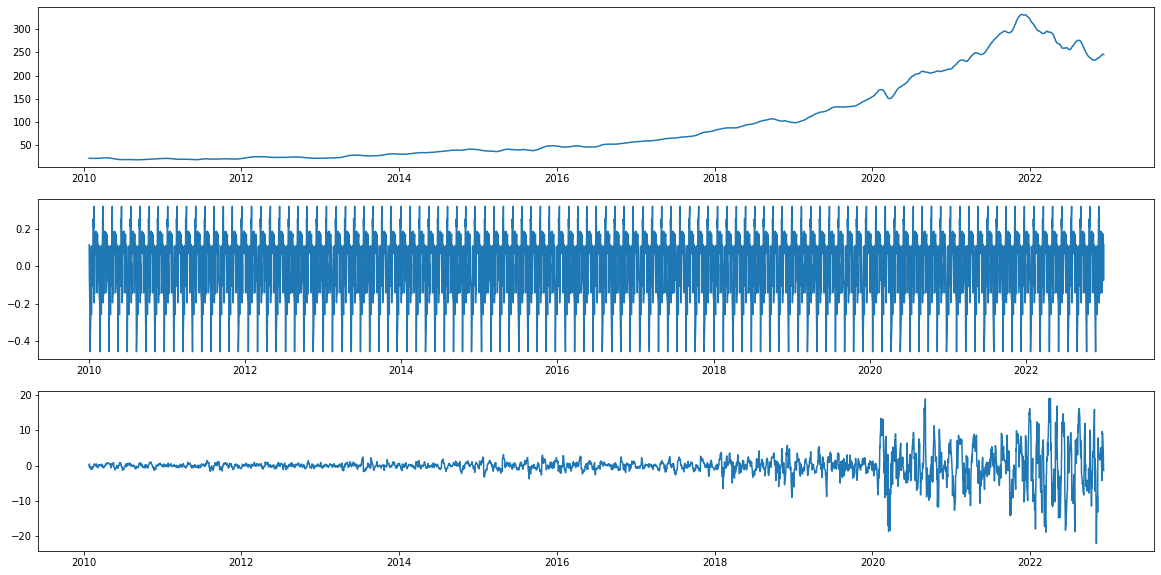

In [ ]:
ticker = data['Adj Close']

ticker.index = data['Adj Close'].index
periods = 30
freq="Q"
startdate_1Y_sub ="2022-1-3"
startdate_3Y_sub ="2019-1-3"
startdate_5Y_sub ="2017-1-3"
startdate_7Y_sub ='2015-1-2'
startdate_12Y_sub ='2010-1-4'
Stock_desc_output_path = './Stocks Prediction/Stock_'+y_symbol[0]+'_desc.png'
Stock_decomposed_output_path = './Stocks Prediction/Stock_'+y_symbol[0]+'_decomp.png'

enddate_sub =(enddate- tdelta(1)).strftime ("%Y-%m-%d")


describe_ticker (ticker,Stock_desc_output_path)
Y_retrun_ticker (ticker,startdate_1Y_sub,enddate_sub,"Year to date returns are")
Y_retrun_ticker (ticker,startdate_3Y_sub,enddate_sub,"3 Years to date returns are")
Y_retrun_ticker (ticker,startdate_5Y_sub,enddate_sub,"5 Years to date returns are")
Y_retrun_ticker (ticker,startdate_7Y_sub,enddate_sub,"7 Years to date returns are")
Y_retrun_ticker (ticker,startdate_12Y_sub,enddate_sub,"12 Years to date returns are")

decomposed = ticker_decompose(ticker,periods)


ticker_trend=decomposed.trend
ticker_seasonal = decomposed.seasonal
ticker_res = decomposed.resid


plot_decom (ticker_trend,ticker_seasonal,ticker_res,Stock_decomposed_output_path)



,Min,Max
Date,,
2010-03-31,21.211456,23.797855
2010-06-30,17.769505,24.132086
2010-09-30,17.885344,20.333384
2010-12-31,18.563028,22.106297
2011-03-31,19.471092,22.551554
2011-06-30,18.752439,20.987608
2011-09-30,19.085701,22.208717
2011-12-31,19.486025,21.736048
2012-03-31,21.466698,26.515633


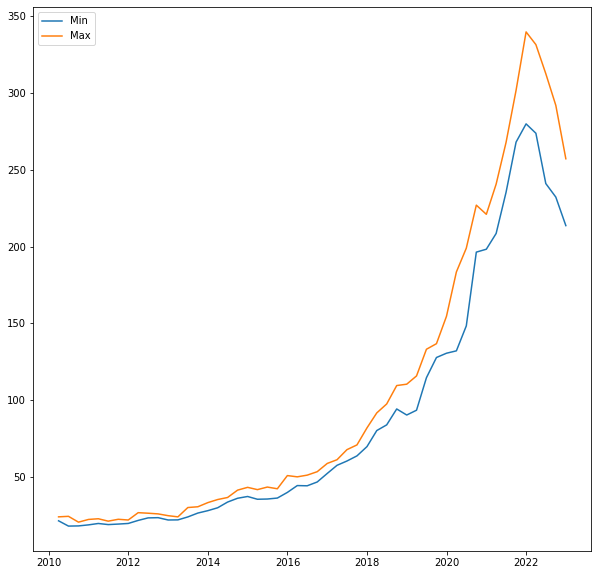

In [ ]:
# get min and max / freq


min_ticker,max_ticker=get_min_max(ticker,freq)

min_max_data = {"Min":min_ticker,
                "Max":max_ticker}

min_max_df = pd.DataFrame (min_max_data,index=min_ticker.index)

fig,ax = plt.subplots (1,1,figsize=(10,10))

ax.plot (min_max_df)
ax.legend(["Min","Max"])

min_max_df

Volume Info

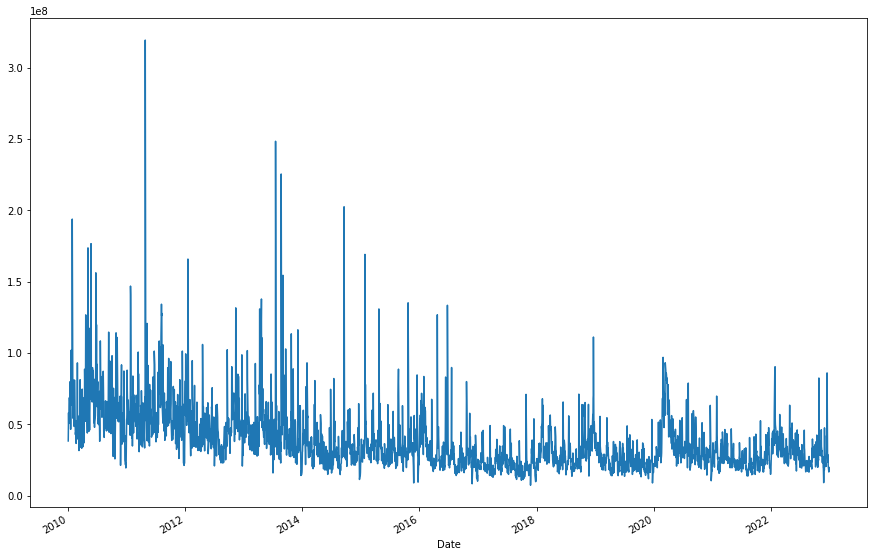

In [ ]:
ticker_Volume =data['Volume']
plt.rcParams['figure.figsize']=15,10
ticker_Volume.plot ()

In [ ]:
print (ticker_Volume.head())
print (ticker_Volume.tail())

Date
2010-01-04    38409100
2010-01-05    49749600
2010-01-06    58182400
2010-01-07    50559700
2010-01-08    51197400
Name: Volume, dtype: int64
Date
2022-12-22    28651700
2022-12-23    21207000
2022-12-27    16688600
2022-12-28    17457100
2022-12-29    19770700
Name: Volume, dtype: int64


In [ ]:
print ("Max volume was",ticker_Volume.max(),"on date",str(ticker_Volume.index[ticker_Volume.values==ticker_Volume.max()])[16:26])
print ("Min volume was",ticker_Volume.min(),"on date",str(ticker_Volume.index[ticker_Volume.values==ticker_Volume.min()])[16:26])

Max volume was 319317900 on date 2011-04-29
Min volume was 7425600 on date 2017-11-24


In [ ]:
ticker_Volume.describe()

count    3.271000e+03
mean     3.801647e+07
std      2.147328e+07
min      7.425600e+06
25%      2.385540e+07
50%      3.228080e+07
75%      4.679375e+07
max      3.193179e+08
Name: Volume, dtype: float64

In [ ]:
ticker_Volume[-1]

19770700

In [ ]:
print ("overall volume avg is ",ticker_Volume.mean())
print ("Current year avg is",ticker_Volume[startdate_1Y_sub:enddate].mean())

overall volume avg is  38016469.33659431
Current year avg is 31256444.8


# **Calls and Puts**

In [ ]:
option_chain= ticker_y.option_chain()
options_calls=option_chain.calls
print (options_calls.columns)
options_puts=option_chain.puts
print (options_puts.columns)

options_calls['lastTradeDate']
options_calls['lastTradeDate'] = options_calls['lastTradeDate'].dt.tz_localize(None)
options_puts['lastTradeDate'] = options_puts['lastTradeDate'].dt.tz_localize(None)


#options_df =pd.DataFrame (option_chain)


Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')
Index(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask',
       'change', 'percentChange', 'volume', 'openInterest',
       'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'],
      dtype='object')


# **Prediction**

**Data Preparation**

In [ ]:
# shift data by 1 day

shift_factor = 1

# start the forecasting of LSTM by 03rd Jan 2022
series = ticker['03-07-2022':].pct_change().values.reshape(-1,1)


values = series.reshape (-1,1)
scaler = MinMaxScaler (feature_range=(-1,1))
values = scaler.fit_transform(values)
X = values [:-1*shift_factor]
X[0]=0
y=values [shift_factor:]

print ("x first 5 items are ",X[0:5])
print ("y first 5 items are ",y[0:5])

print ("\n x length is ",len(X))
print ("\n y length is ",len(y))

x first 5 items are  [[ 0.        ]
 [-0.16969909]
 [ 0.54323386]
 [-0.15860355]
 [-0.27453895]]
y first 5 items are  [[-0.16969909]
 [ 0.54323386]
 [-0.15860355]
 [-0.27453895]
 [-0.19466282]]

 x length is  206

 y length is  206


In [ ]:
print ("series head is \n",series[0:5])
print ("series tail is \n",series[-5:-1])
print ("series last item is \n ",series[244:248])

series head is 
 [[        nan]
 [-0.01097121]
 [ 0.04585822]
 [-0.01008676]
 [-0.01932822]]
series tail is 
 [[-0.02552874]
 [ 0.00226707]
 [-0.00741419]
 [-0.01025493]]
series last item is 
  []


In [ ]:
n_points = len (series)
train_points = int (2/3*n_points)+1
X_train , X_test = X[:train_points],X[train_points:]
y_train,y_test = y[:train_points],y[train_points:]

print ("full dataset is {} points ".format (len(series)))
print ("n points is ",train_points)
print ("we have x {} and y {} training points".format(len(X_train),len(y_train)))
print ("we have x {} and y {} testing points".format(len(X_test),len(y_test)))

full dataset is 207 points 
n points is  139
we have x 139 and y 139 training points
we have x 67 and y 67 testing points


**Arma**

**ARIMA**

# **LSTM Implementation Final**

series is  Date
2022-03-07    276.892181
2022-03-08    273.854340
2022-03-09    286.412811
2022-03-10    283.523834
2022-03-11    278.043823
                 ...    
2022-12-14    257.220001
2022-12-15    249.009995
2022-12-16    244.690002
2022-12-19    240.449997
2022-12-20    241.800003
Name: Adj Close, Length: 201, dtype: float64


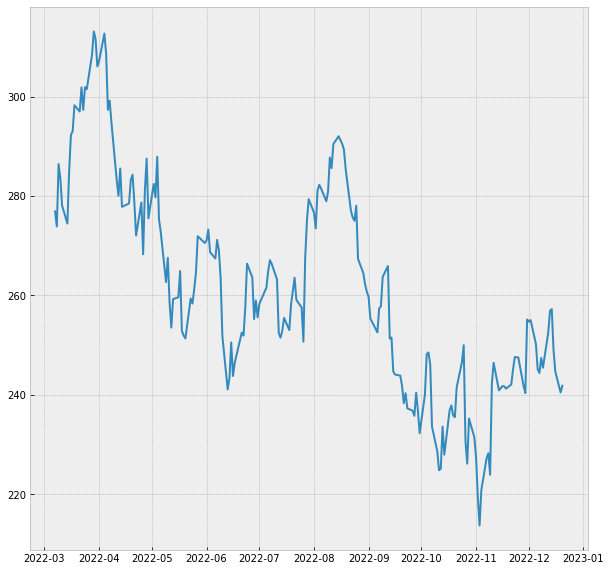

In [ ]:
# Prepare LSTM Data

series_start_date = '03-07-2022'
series_end_date = '2022-12-20'

#series to train the LSTM on
series = ticker[series_start_date:series_end_date]
print ("series is ",series)
fig,ax = plt.subplots (1,1,figsize=(10,10))
ax.plot (series)

In [ ]:
# Make Windows 
WINDOW_SIZE = 5
def ticker_to_X_y(series,window_size=5):

  if isinstance(series, pd.Series):
        series_as_np = series.to_numpy()
  
  X =[]
  y=[]

  for i in range (len(series)-window_size):

    row = [[a] for a in series[i:i+window_size]]
    X.append (row)
    label = series [i+window_size]
    y.append (label)

  return np.array(X),np.array (y)

#print ("type of ticker is ",type (ticker))
X,y = ticker_to_X_y(series,WINDOW_SIZE)



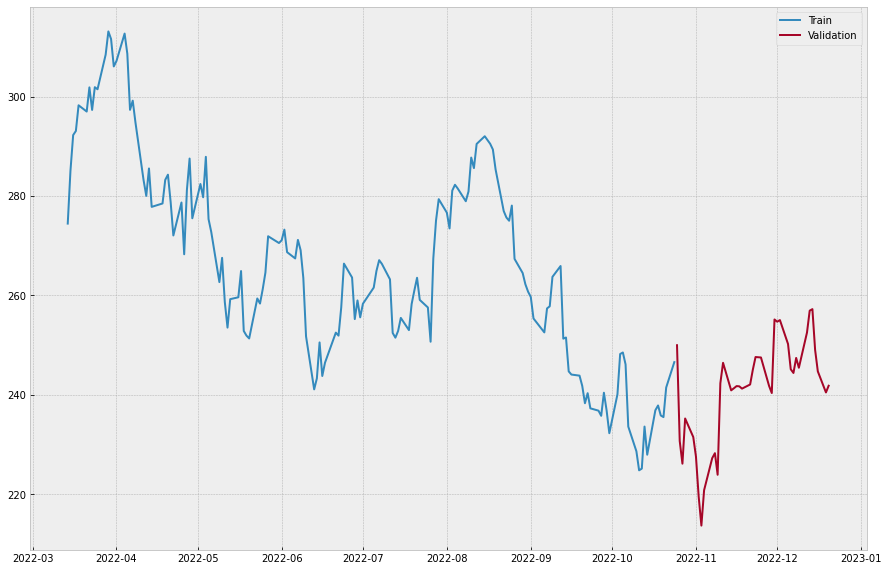

In [ ]:
# Make train and Validation sets

train_percentange = .8
train_len = int (.8*len(X))
X_train,y_train = X[:train_len],y[:train_len]
X_val,y_val = X[train_len:],y[train_len:]


plt.plot(series[WINDOW_SIZE:train_len+WINDOW_SIZE].index, y_train)
plt.plot(series [train_len+WINDOW_SIZE:].index ,y_val)

plt.legend(['Train', 'Validation'])


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras import layers


LSTM_Layer1_nodes = 64
LSTM_Layer2_nodes = 32
LSTM_Layer3_nodes = 32
LSTM_output_Layer = 1
LSTM_epochs=200

keras.backend.clear_session()

LSTM_model = Sequential([layers.Input((WINDOW_SIZE, 1)),
                    layers.LSTM(LSTM_Layer1_nodes),
                    layers.Dense(LSTM_Layer2_nodes, activation='relu'),
                    layers.Dense(LSTM_Layer3_nodes, activation='relu'),
                    layers.Dense(LSTM_output_Layer)])

LSTM_model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

LSTM_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=LSTM_epochs)

Epoch 1/200
5/5 [==============================] - 3s 144ms/step - loss: 71056.1406 - mean_absolute_error: 265.7794 - val_loss: 57754.6328 - val_mean_absolute_error: 240.0825
Epoch 2/200
5/5 [==============================] - 0s 11ms/step - loss: 70777.0234 - mean_absolute_error: 265.2532 - val_loss: 57534.1875 - val_mean_absolute_error: 239.6230
Epoch 3/200
5/5 [==============================] - 0s 11ms/step - loss: 70552.6250 - mean_absolute_error: 264.8303 - val_loss: 57334.9883 - val_mean_absolute_error: 239.2069
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 70318.9141 - mean_absolute_error: 264.3881 - val_loss: 57096.6055 - val_mean_absolute_error: 238.7081
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 70042.7656 - mean_absolute_error: 263.8632 - val_loss: 56815.3008 - val_mean_absolute_error: 238.1180
Epoch 6/200
5/5 [==============================] - 0s 11ms/step - loss: 69708.4062 - mean_absolute_error: 263.2282 - val_loss: 56

In [ ]:
def train_prediction_fn (model,training_data,training_observations,training_date_range):

  train_predictions = model.predict(training_data).flatten()
  plt.plot(training_date_range, train_predictions)
  plt.plot(training_date_range, training_observations)
  plt.legend(['Training Predictions', 'Training Observations'])

  return train_predictions

5/5 [==============================] - 0s 4ms/step


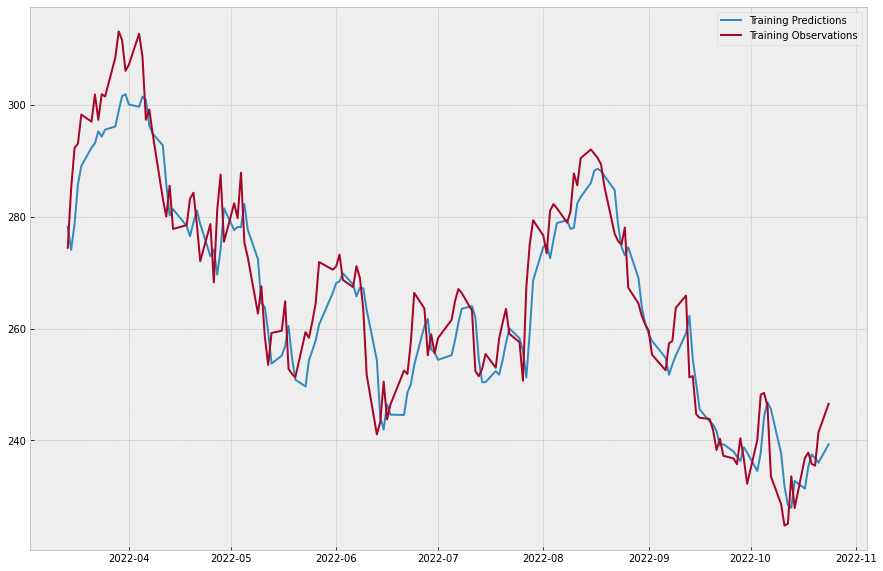

In [ ]:
LSTM_train_predictions= train_prediction_fn (LSTM_model,X_train,y_train,series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)

In [ ]:
def validate_prediction_fn (model,validation_data,validation_observations,validation_date_range):
  val_predictions = model.predict(validation_data).flatten()

  plt.plot(validation_date_range, val_predictions)
  plt.plot(validation_date_range, validation_observations)
  plt.legend(['Validation Predictions', 'Validation Observations'])

  return val_predictions

2/2 [==============================] - 0s 5ms/step


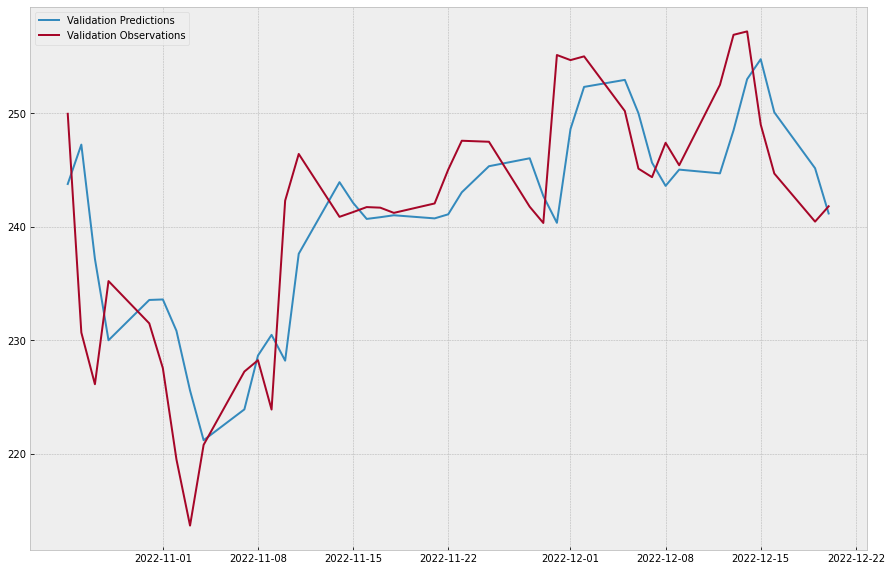

In [ ]:
LSTM_val_predictions =validate_prediction_fn (LSTM_model,X_val,y_val,series [train_len+WINDOW_SIZE:].index)

In [ ]:
# Make predictions for 15 business days after the validation dataset
from copy import deepcopy
# training_data = X_train
#training_date_range = series [train_len+WINDOW_SIZE:].index


def prediction_future_fn (series_prediction_timeframe,model,training_data,training_date_range):

  
  # make the LSTM predict between 21th Dec and 30th Dec for 15 business days after
  

  recursive_predictions = []
  recursive_dates = np.concatenate([training_date_range, series_prediction_timeframe])


  last_window = deepcopy(training_data[-1])
  for target_date in recursive_dates:

    #print ("last window is ",last_window)
  
    next_prediction = model.predict(np.array([last_window])).flatten()
    
    #print ("next prediction is ",next_prediction)
    recursive_predictions.append(next_prediction)
    last_window[0:-1] = last_window[1:]
    last_window[-1] = next_prediction

  return recursive_dates,recursive_predictions



In [ ]:
LSTM_series_start_predict = '2022-12-21'
LSTM_prediction_period = 15
LSTM_series_prediction_timeframe = pd.bdate_range(start=LSTM_series_start_predict, periods=LSTM_prediction_period, freq='C',holidays=['2022-11-23','2022-12-25','2023-01-01','2023-01-02'])

LSTM_recursive_dates,LSTM_recursive_predictions = prediction_future_fn (LSTM_series_prediction_timeframe,LSTM_model,X_train,series [train_len+WINDOW_SIZE:].index)

1/1 [==============================] - 0s 22ms/step


In [ ]:
#LSTM_recursive_dates
LSTM_recursive_predictions

[array([239.3144], dtype=float32),
 array([239.51845], dtype=float32),
 array([239.25423], dtype=float32),
 array([239.00273], dtype=float32),
 array([238.8347], dtype=float32),
 array([238.66762], dtype=float32),
 array([238.53008], dtype=float32),
 array([238.41154], dtype=float32),
 array([238.30977], dtype=float32),
 array([238.22298], dtype=float32),
 array([238.14874], dtype=float32),
 array([238.08539], dtype=float32),
 array([238.03137], dtype=float32),
 array([237.98532], dtype=float32),
 array([237.94609], dtype=float32),
 array([237.91269], dtype=float32),
 array([237.88426], dtype=float32),
 array([237.86008], dtype=float32),
 array([237.83951], dtype=float32),
 array([237.82199], dtype=float32),
 array([237.80708], dtype=float32),
 array([237.79445], dtype=float32),
 array([237.7837], dtype=float32),
 array([237.77457], dtype=float32),
 array([237.76677], dtype=float32),
 array([237.76016], dtype=float32),
 array([237.75453], dtype=float32),
 array([237.74977], dtype=float

In [ ]:
def plot_predictions_fn (training_date_range,train_predictions,training_observations,val_predictions,val_observations,recursive_dates,recursive_predictions):

  plt.plot(training_date_range, train_predictions)
  plt.plot(training_date_range, training_observations)
  plt.plot(series [train_len+WINDOW_SIZE:].index, val_predictions)
  plt.plot(series [train_len+WINDOW_SIZE:].index, val_observations)
  plt.plot(recursive_dates, recursive_predictions)
  plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Recursive Predictions'])
  return



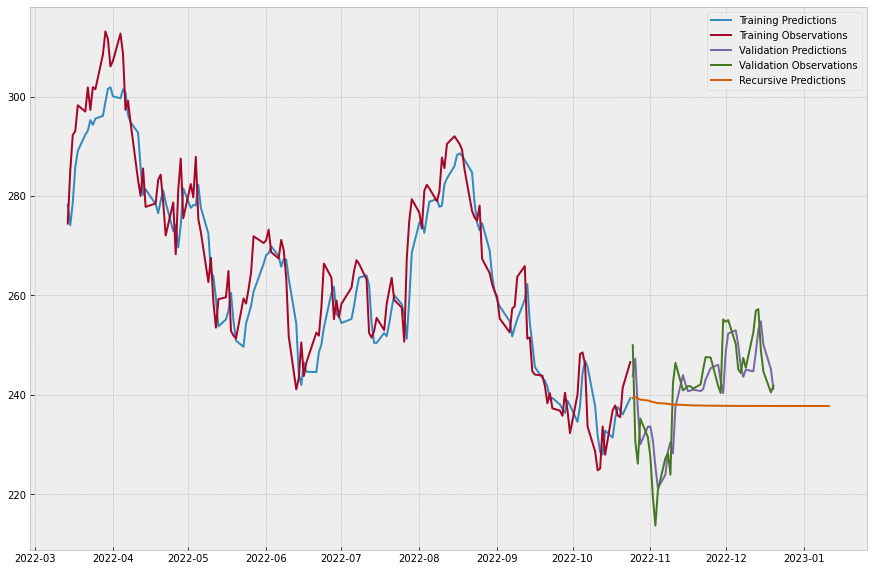

In [ ]:
plot_predictions_fn (series[WINDOW_SIZE:train_len+WINDOW_SIZE].index,LSTM_train_predictions,y_train,LSTM_val_predictions,y_val,LSTM_recursive_dates, LSTM_recursive_predictions)

In [ ]:
#output prediction

LSTM_train_df = pd.DataFrame (LSTM_train_predictions,index=series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)
LSTM_val_df = pd.DataFrame (LSTM_val_predictions,index=series [train_len+WINDOW_SIZE:].index)
LSTM_prediction_df = pd.DataFrame (LSTM_recursive_predictions,index=LSTM_recursive_dates)
#print ("recursive dates are ",LSTM_recursive_dates)
LSTM_final_df=LSTM_train_df.append (LSTM_val_df)
LSTM_final_df = LSTM_final_df.append (LSTM_prediction_df)

LSTM_final_df

# Save Data to File
#writer.save()

,0
2022-03-14,278.209534
2022-03-15,274.103516
2022-03-16,278.654510
2022-03-17,285.791382
2022-03-18,289.064209
...,...
2023-01-05,237.723495
2023-01-06,237.723404
2023-01-09,237.723312
2023-01-10,237.723236


# GRU

In [ ]:
GRU_Layer1_nodes = 64
GRU_Layer2_nodes = 32
GRU_Layer3_nodes = 32
GRU_output_Layer = 1
GRU_epochs=500

keras.backend.clear_session()

GRU_model = Sequential([layers.Input((WINDOW_SIZE, 1)),
                    layers.GRU(GRU_Layer1_nodes),
                    layers.Dense(GRU_Layer2_nodes, activation='relu'),
                    layers.Dense(GRU_Layer3_nodes, activation='relu'),
                    layers.Dense(GRU_output_Layer)])

GRU_model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

GRU_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=GRU_epochs)

Epoch 1/500
5/5 [==============================] - 5s 256ms/step - loss: 71510.2344 - mean_absolute_error: 266.6311 - val_loss: 58078.4492 - val_mean_absolute_error: 240.7559
Epoch 2/500
5/5 [==============================] - 0s 26ms/step - loss: 71080.4219 - mean_absolute_error: 265.8249 - val_loss: 57706.6250 - val_mean_absolute_error: 239.9825
Epoch 3/500
5/5 [==============================] - 0s 26ms/step - loss: 70680.1016 - mean_absolute_error: 265.0701 - val_loss: 57375.5508 - val_mean_absolute_error: 239.2917
Epoch 4/500
5/5 [==============================] - 0s 18ms/step - loss: 70324.3828 - mean_absolute_error: 264.3991 - val_loss: 57055.7891 - val_mean_absolute_error: 238.6227
Epoch 5/500
5/5 [==============================] - 0s 25ms/step - loss: 69973.9219 - mean_absolute_error: 263.7345 - val_loss: 56743.3867 - val_mean_absolute_error: 237.9672
Epoch 6/500
5/5 [==============================] - 0s 19ms/step - loss: 69617.8594 - mean_absolute_error: 263.0583 - val_loss: 56

5/5 [==============================] - 0s 3ms/step


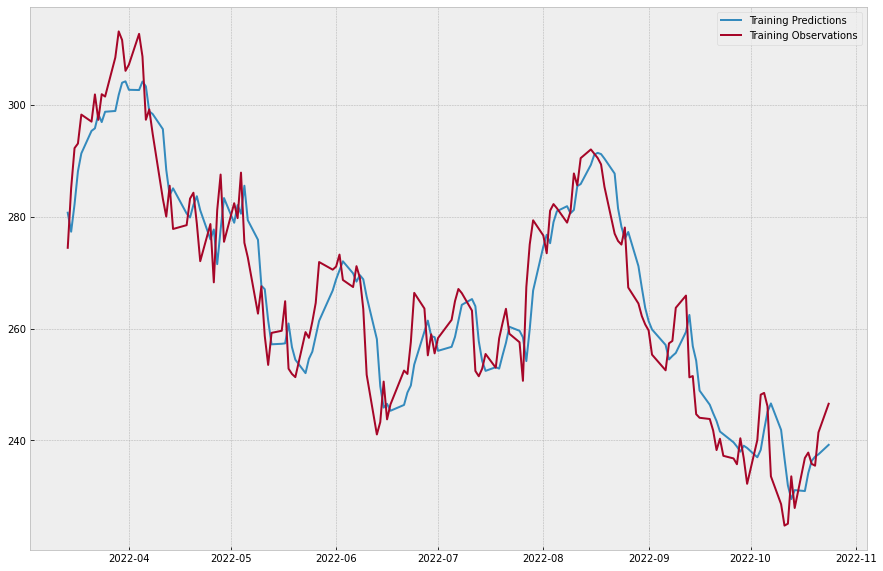

In [ ]:
GRU_train_predictions= train_prediction_fn (GRU_model,X_train,y_train,series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)

2/2 [==============================] - 0s 7ms/step


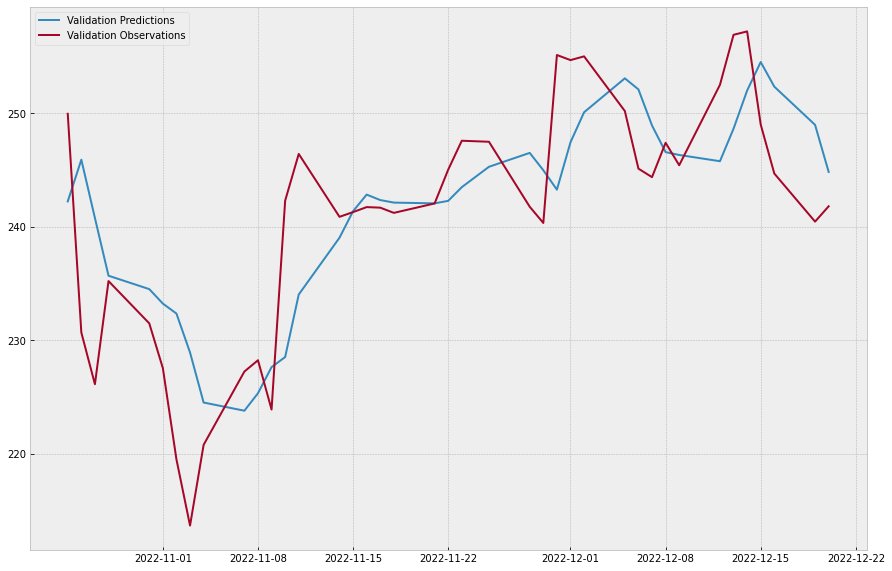

In [ ]:
GRU_val_predictions =validate_prediction_fn (GRU_model,X_val,y_val,series [train_len+WINDOW_SIZE:].index)

1/1 [==============================] - 0s 17ms/step


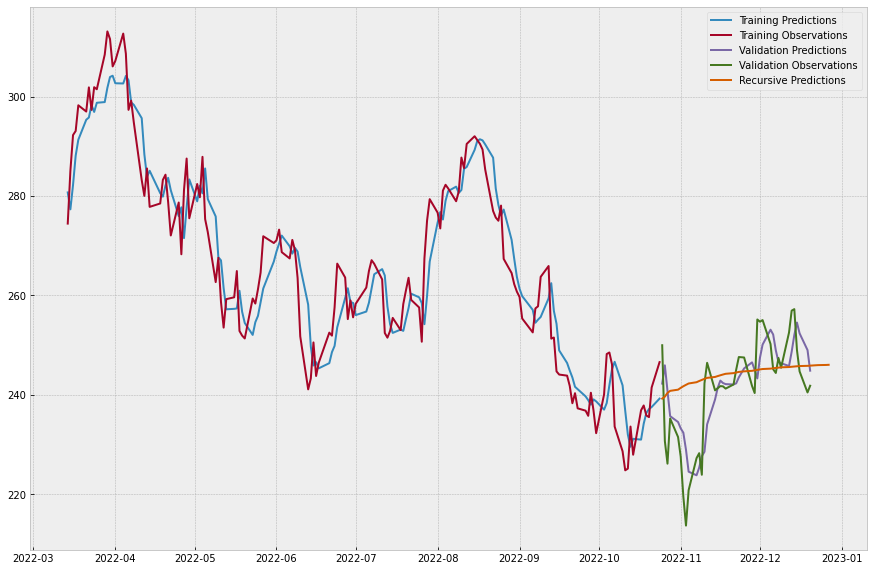

In [ ]:
GRU_series_start_predict = '2022-12-21'
GRU_prediction_period = 5
GRU_series_prediction_timeframe = pd.bdate_range(start=GRU_series_start_predict, periods=GRU_prediction_period, freq='C',holidays=['2022-11-23','2022-12-25','2023-01-01','2023-01-02'])

GRU_recursive_dates,GRU_recursive_predictions = prediction_future_fn (GRU_series_prediction_timeframe,GRU_model,X_train,series [train_len+WINDOW_SIZE:].index)
plot_predictions_fn (series[WINDOW_SIZE:train_len+WINDOW_SIZE].index,GRU_train_predictions,y_train,GRU_val_predictions,y_val,GRU_recursive_dates, GRU_recursive_predictions)

In [ ]:
#output prediction

GRU_train_df = pd.DataFrame (GRU_train_predictions,index=series[WINDOW_SIZE:train_len+WINDOW_SIZE].index)
GRU_val_df = pd.DataFrame (GRU_val_predictions,index=series [train_len+WINDOW_SIZE:].index)
GRU_prediction_df = pd.DataFrame (GRU_recursive_predictions,index=GRU_recursive_dates)

GRU_final_df=GRU_train_df.append (GRU_val_df)
GRU_final_df = GRU_final_df.append (GRU_prediction_df)

# Create a Pandas Excel writer using XlsxWriter
#writer = pd.ExcelWriter('./Stocks Prediction/"MSFT.xlsx', engine='xlsxwriter')

GRU_final_df

,0
2022-03-14,280.715271
2022-03-15,277.313080
2022-03-16,282.213562
2022-03-17,288.115723
2022-03-18,291.317413
...,...
2022-12-21,245.883484
2022-12-22,245.918808
2022-12-23,245.952148
2022-12-26,245.983536


# **ARMA**

In [ ]:
lrets = np.log(data['Adj Close']/data['Adj Close'].shift(1)).dropna()

print (lrets)

# forecast start date
last_day = lrets.last('D').index
#start_date = last_day.date + timedelta(days=1)

max_lag = 30
#forecast_period =21

Date
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
2010-01-08    0.006873
2010-01-11   -0.012802
                ...   
2022-12-22   -0.025860
2022-12-23    0.002265
2022-12-27   -0.007442
2022-12-28   -0.010308
2022-12-29    0.027255
Name: Adj Close, Length: 3270, dtype: float64


In [ ]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [ ]:
# plot the residuals
def plt_residuals (model_res):
  residualsDF = pd.DataFrame(model_res.resid)
  #residuals = model_res
  residualsDF.plot()
  residualsDF.plot(kind='kde')
  plt.show()
  print(residualsDF.describe())
  _ = tsplot(model_res.resid, lags=max_lag)
  
  return

In [ ]:
# Notice I've selected a specific time period to run this analysis

ARMA_series_start_date ='03-07-2022'
ARMA_series_end_date = '31-12-2022'

TS = lrets.loc[ARMA_series_start_date:ARMA_series_end_date]

In [ ]:
# Create a n day forecast of the ticker selecetd and returns with 95%, 99% CI
#n_steps = forecast_period

def forecast_stock(start_date,best_mdl,n_steps,original_TS,train=True):
  

  f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
  _, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI



  #idx = pd.date_range(data.index[-1], periods=n_steps, freq='D')
  #print(start_date)
  if (train):
    idx=original_TS.index
  else:
    idx=pd.bdate_range(start=start_date, periods=n_steps, freq='C',holidays=['2022-11-24','2023-01-01'])

  fc_95 = pd.DataFrame(np.column_stack([f, ci95]),index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
  fc_99 = pd.DataFrame(np.column_stack([ci99]),index=idx, columns=['lower_ci_99', 'upper_ci_99'])
  fc_all = fc_95.combine_first(fc_99)
  #print (fc_all)
  
  return fc_all


In [ ]:
# plot ur forecast 

def plot_stock (model,stock,ticker_data,n_steps,ticker_symb):
  
  plt.style.use('bmh')
  fig = plt.figure(figsize=(9,7))
  ax = plt.gca()

  # get historical data for last 1/3 of the readings
  #historical_len = int (1/3*len (stock))
  #ts_ticker = stock.iloc[-historical_len:].copy()
  ts_ticker = stock.copy()
  
  
  ticker_x = ticker_symb+' Returns'
  print (ticker_x)

  ts_ticker.plot (ax=ax,label=ticker_x)
  

  # in sample prediction
  pred = model.predict(ts_ticker.index[0], ts_ticker.index[-1])
  
  
  pred.plot(ax=ax, style='r-', label='In-sample prediction')
  styles = ['b-','0.2', '0.75', '0.2', '0.75']
  
  ticker_data.plot(ax=ax, style=styles)
  plt.fill_between(ticker_data.index, ticker_data.lower_ci_95, ticker_data.upper_ci_95, color='gray', alpha=0.7)
  plt.fill_between(ticker_data.index, ticker_data.lower_ci_99, ticker_data.upper_ci_99, color='gray', alpha=0.2)
  plt.title('{} Day MSFT Return Forecast\nARIMA{}'.format(n_steps, model))
  plt.legend(loc='best', fontsize=10)

  return

In [ ]:
def forecast_tkr_stocks(ticker_data,ticker_predicted_retruns,prediction_period,train=True):

  ticker_predicted_retruns['Predicted_Price'] = np.empty (prediction_period)
    
  if (train):
    ticker_predicted_retruns['Predicted_Price'][0]=ticker_data[0]
  else:
    ticker_predicted_retruns['Predicted_Price'][0]=float (ticker_data.iloc[-1])
    print (ticker_predicted_retruns['Predicted_Price'][0])


  if (train):
    for i in range(1,prediction_period):
      ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_predicted_retruns['Predicted_Price'][i-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
  else:

    for i in range (0,prediction_period):
      if (i==0):
        ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_data.iloc[-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
      else:
        ticker_predicted_retruns['Predicted_Price'][i]=float(ticker_predicted_retruns['Predicted_Price'][i-1]* np.exp(ticker_predicted_retruns['forecast'][i]))
  
  return ticker_predicted_retruns
    
  

In [ ]:
def _get_best_model_ARMA(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    for i in pq_rng:
      for j in pq_rng:
        try:

          tmp_mdl = smt.ARMA(TS, order=(i,j)).fit(method='mle', trend='nc')
          tmp_aic = tmp_mdl.aic
          if tmp_aic < best_aic:

            best_aic = tmp_aic
            best_order = (i,j)
            best_mdl = tmp_mdl
          
        except: continue
    
    p('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    
    return best_aic, best_order, best_mdl

aic: -981.11300 | order: (2, 2)


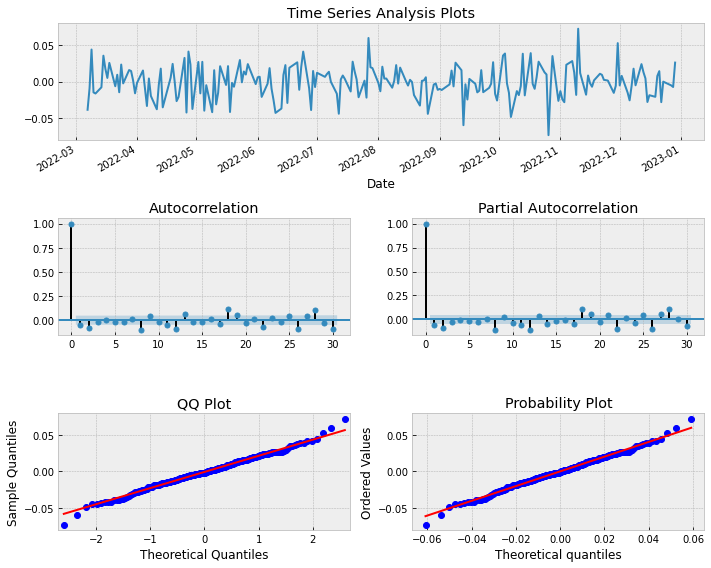

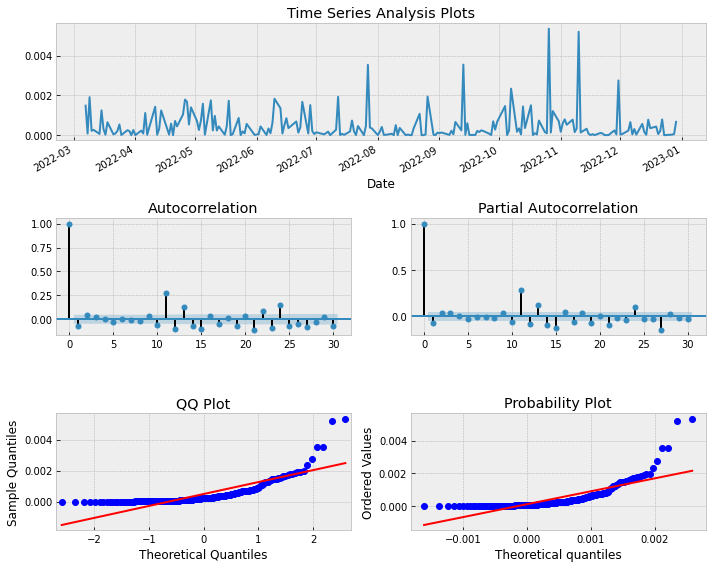

In [ ]:
best_ARMA_aic,best_ARMS_order, best_model_ARMA = _get_best_model_ARMA(TS) 

#plt_residuals (best_model_ARMA)

#plot ARMA
_ = tsplot(best_model_ARMA.resid, lags=30)
#_ = tsplot(best_model_ARMA, lags=30)

# plot residuals of ARIMA
_ = tsplot((best_model_ARMA.resid)**2, lags=30)

Date
2022-03-07   -0.038509
2022-03-08   -0.011032
2022-03-09    0.044838
2022-03-10   -0.010138
2022-03-11   -0.019517
Name: Adj Close, dtype: float64
MSFT Returns


207

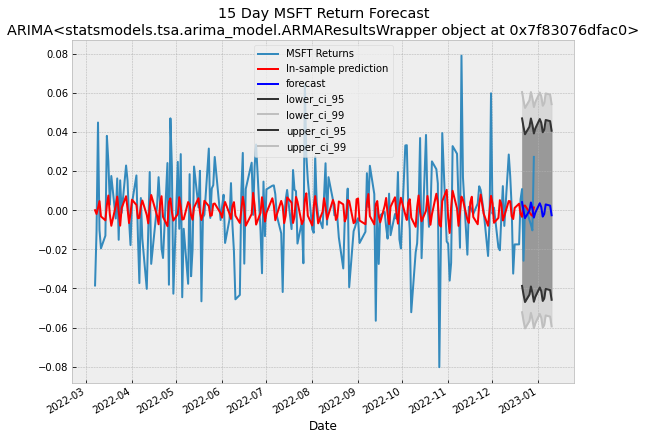

In [ ]:
# Forecast ARIMA for 21 days


ARMA_series_start_predict = '2022-12-21'
ARMA_prediction_period = 15

print (TS[:ARMA_series_start_predict].head())

train_ticker_data_ARMA = forecast_stock(startdate_12Y,best_model_ARMA,len (TS[:series_end_date]),TS[:series_end_date],train=True)
forecast_ticker_data_ARMA = forecast_stock(ARMA_series_start_predict,best_model_ARMA,ARMA_prediction_period,TS[:ARMA_series_start_predict],train=False)
#print ("Forecast ARMA \n",forecast_ticker_data_ARMA)
#print ("lerts \n",lrets)
plot_stock (best_model_ARMA,TS,forecast_ticker_data_ARMA,ARMA_prediction_period,y_symbol[0])
len (TS)

In [ ]:
train_forecast= forecast_tkr_stocks (data['Adj Close'][ARMA_series_start_date:],train_ticker_data_ARMA,len (TS[:series_end_date]),train=True)
#train_forecast= forecast_tkr_stocks (TS,train_ticker_data_ARMA,len (TS[:series_end_date]),train=True)
train_forecast

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99,Predicted_Price
Date,,,,,,
2022-03-07,0.004116,-0.038724,-0.052185,0.046955,0.060416,276.892181
2022-03-08,-0.000308,-0.043198,-0.056676,0.042582,0.056060,276.806927
2022-03-09,-0.004072,-0.046977,-0.060459,0.038833,0.052315,275.682052
2022-03-10,-0.000221,-0.043169,-0.056664,0.042727,0.056222,275.621179
2022-03-11,0.003961,-0.039008,-0.052510,0.046930,0.060432,276.715161
...,...,...,...,...,...,...
2022-12-14,0.000561,-0.043793,-0.057730,0.044914,0.058851,276.319739
2022-12-15,0.000040,-0.044314,-0.058251,0.044395,0.058332,276.330884
2022-12-16,-0.000544,-0.044899,-0.058836,0.043811,0.057748,276.180594


In [ ]:
forecast_ticker_data_ARMA

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
2022-12-21,0.004116,-0.038724,-0.052185,0.046955,0.060416
2022-12-22,-0.000308,-0.043198,-0.056676,0.042582,0.056060
2022-12-23,-0.004072,-0.046977,-0.060459,0.038833,0.052315
2022-12-26,-0.000221,-0.043169,-0.056664,0.042727,0.056222
2022-12-27,0.003961,-0.039008,-0.052510,0.046930,0.060432
2022-12-28,0.000725,-0.042278,-0.055790,0.043727,0.057239
2022-12-29,-0.003788,-0.046818,-0.060339,0.039242,0.052763
2022-12-30,-0.001196,-0.044251,-0.057780,0.041859,0.055388
2023-01-02,0.003558,-0.039531,-0.053070,0.046647,0.060186
2023-01-03,0.001629,-0.041477,-0.055022,0.044734,0.058279


In [ ]:
# here you should pass the last predicted data from the train_forecast dataframe

forecast_tkr_ARMA_predict=forecast_tkr_stocks (train_forecast['Predicted_Price'],forecast_ticker_data_ARMA,ARMA_prediction_period,train=False)
forecast_tkr_ARMA_predict

276.293757069383


,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99,Predicted_Price
2022-12-21,0.004116,-0.038724,-0.052185,0.046955,0.060416,277.433271
2022-12-22,-0.000308,-0.043198,-0.056676,0.042582,0.056060,277.347849
2022-12-23,-0.004072,-0.046977,-0.060459,0.038833,0.052315,276.220776
2022-12-26,-0.000221,-0.043169,-0.056664,0.042727,0.056222,276.159785
2022-12-27,0.003961,-0.039008,-0.052510,0.046930,0.060432,277.255904
2022-12-28,0.000725,-0.042278,-0.055790,0.043727,0.057239,277.456904
2022-12-29,-0.003788,-0.046818,-0.060339,0.039242,0.052763,276.407848
2022-12-30,-0.001196,-0.044251,-0.057780,0.041859,0.055388,276.077421
2023-01-02,0.003558,-0.039531,-0.053070,0.046647,0.060186,277.061449
2023-01-03,0.001629,-0.041477,-0.055022,0.044734,0.058279,277.513018


In [ ]:
forecast_ARMA = pd.DataFrame (train_forecast['Predicted_Price'],index=train_forecast.index)
#forecast_ARMA.append (forecast_tkr_ARMA_predict['Predicted_Price'])


In [ ]:
forecast_tkr_ARMA_predict_df=pd.DataFrame(forecast_tkr_ARMA_predict['Predicted_Price'])

In [ ]:
forecast_ARMA.append (forecast_tkr_ARMA_predict_df)

,Predicted_Price
2022-03-07,276.892181
2022-03-08,276.806927
2022-03-09,275.682052
2022-03-10,275.621179
2022-03-11,276.715161
...,...
2023-01-04,276.605096
2023-01-05,276.047996
2023-01-06,276.864085
2023-01-09,277.516622


# **Output file**

In [ ]:
# Create a Pandas Excel writer using XlsxWriter
output_path = './Stocks Prediction/'+ y_symbol[0]+'.xlsx'
writer = pd.ExcelWriter(output_path, engine='xlsxwriter')


#Ticker full historical data
ticker.to_excel(writer, sheet_name='historical_adj_close', index=True)




#ticker volume
ticker_Volume.to_excel(writer, sheet_name='volume', index=True)

#ticker min and max prices / Q
min_max_df.to_excel(writer, sheet_name='min_max_q', index=True)

#holders
ticker_holders_df.to_excel(writer, sheet_name='holders', index=True)

#Instit holders
ticker_instit_holders_df.to_excel(writer, sheet_name='Instit holders', index=True)

#quarter earnings
q_earnings_df.to_excel(writer, sheet_name='q_earnings', index=True)

#Recommendations
recommendations_df.to_excel(writer, sheet_name='recomm', index=True)

#Analysts Price Recommendations
analyst_price_target_df.to_excel(writer, sheet_name='analyst_p_recom', index=True)

#Revenue Forecast
revenue_forecasts_df.to_excel(writer, sheet_name='rev_forecast', index=True)

#News
news_df.to_excel(writer, sheet_name='news', index=True)

#options calls
options_calls.to_excel(writer, sheet_name='options_calls', index=True)

#options puts
options_puts.to_excel(writer, sheet_name='options_puts', index=True)


#ARMA forecast
forecast_ARMA.to_excel(writer,sheet_name='ARMA',index=True)

#final_df.to_excel("./Stocks Prediction/LSTM3_Ticker.xlsx")
LSTM_final_df.to_excel(writer, sheet_name='LSTM', index=True)


#final_df.to_excel("./Stocks Prediction/LSTM3_Ticker.xlsx")
GRU_final_df.to_excel(writer, sheet_name='GRU', index=True)


# Save Data to File
writer.save()

print (writer)

writer.close()

In [ ]:
# Save charts
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

#description chart
wb = load_workbook(output_path)
ws = wb.create_sheet('charts1')
ws['A1'] = 'Charts showing price and differences'
img = Image(Stock_desc_output_path)
ws.add_image(img, 'A2')

#decomposition chart
ws2 = wb.create_sheet('charts2')
ws2['A1'] = 'Charts stock decomposition'
img = Image(Stock_decomposed_output_path)
ws2.add_image(img, 'A2')


wb.save(output_path)


 **bold text**# **What is next**

**1**- Do the ARIMA forecast model